                                                 MOVIE RATING PREDICTION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import re
try:
    moviedata = pd.read_csv('C:\\Users\\DIVYA\\moviedata.csv', sep=",", engine='python', encoding='latin1')
except UnicodeDecodeError:
    moviedata = pd.read_csv('C:\\Users\\DIVYA\\moviedata.csv', sep=",", engine='python', encoding='utf-8', errors='ignore')
moviedata.dropna(inplace=True)
moviedata

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


                                                       SHAPE OF THE DATA SET

In [53]:
moviedata.shape

(5659, 10)

                                                         DESCRIPTION OF A DATA SET

In [54]:
moviedata.describe()

,Year,Rating
count,5659.000000,5659.000000
mean,-1996.247570,5.898533
std,19.741839,1.381165
min,-2021.000000,1.100000
25%,-2013.000000,5.000000
50%,-2002.000000,6.100000
75%,-1983.000000,6.900000
max,-1931.000000,10.000000


In [55]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


                                                      CHECKING THE NULL VALUES

In [56]:
moviedata.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

                                                       COUNT OF GENRE IN MOVIE DATA SET

In [58]:
moviedata['Genre'].value_counts()

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

In [59]:
moviedata['Year'].value_counts()

Year
-2019.0    227
-2017.0    211
-2018.0    202
-2015.0    177
-2016.0    173
          ... 
-1931.0      2
-1939.0      2
-1934.0      2
-1933.0      1
-1932.0      1
Name: count, Length: 91, dtype: int64

In [60]:
moviedata['Name']

1        #Gadhvi (He thought he was Gandhi)
3                                   #Yaaram
5                      ...Aur Pyaar Ho Gaya
6                                 ...Yahaan
8                        ?: A Question Mark
                        ...                
15493                                Zubaan
15494                              Zubeidaa
15503                       Zulm Ki Zanjeer
15505                                 Zulmi
15508                          Zulm-O-Sitam
Name: Name, Length: 5659, dtype: object

In [61]:
moviedata.Name[moviedata.Genre=='Drama']

1        #Gadhvi (He thought he was Gandhi)
10                1:1.6 An Ode to Lost Love
30                           15 Park Avenue
32                              15th August
36                           19 Revolutions
                        ...                
15457                               Zindagi
15466                      Zindagi Aur Maut
15482                      Zindagi Zindabad
15488                                   Zoo
15493                                Zubaan
Name: Name, Length: 844, dtype: object

In [62]:
moviedata.Name[moviedata.Genre=='Romance']

156          A New Love Ishtory
323              Aaja Meri Jaan
426             Aao Pyaar Karen
479                      Aashiq
482      Aashiq Hoon Baharon Ka
                  ...          
15100         Woh Tera Naam Tha
15150         Yaara Silly Silly
15210            Ye Stupid Pyar
15460                   Zindagi
15478         Zindagi Tere Naam
Name: Name, Length: 126, dtype: object

In [63]:
moviedata.Name[moviedata.Genre=='Action']

34                       18.11
114                7 Bijliyaan
129                 9 O' Clock
181               Aa Gaya Hero
198      Aadha Din Aadhee Raat
                 ...          
14855                  Vidrohi
14856               Viduthalai
14931             Vishwasghaat
15155           Yaaron Ka Yaar
15159           Yadon Ki Kasam
Name: Name, Length: 170, dtype: object

In [77]:
moviedata.Name[moviedata.Genre=='Comedy']

45          1982 - A Love Marriage
58                    2016 the End
74                           3 Dev
526                 Ab Ayega Mazaa
530       Ab Hoga Dharna Unlimited
                   ...            
15162       Yahan Sabhi Gyani Hain
15190          Yash Raaj aur Film!
15288    Yeh Suhaagraat Impossible
15416                     Zed Plus
15471               Zindagi Jalebi
Name: Name, Length: 187, dtype: object

In [70]:
moviedata

[1        False
 3        False
 5        False
 6        False
 8        False
          ...  
 15493    False
 15494    False
 15503    False
 15505    False
 15508    False
 Name: Genre, Length: 5659, dtype: bool]

                                            DATA OF GENRE 'ACTION' IN MOVIE DATA SET

In [80]:
bw=moviedata[moviedata.Genre=='Action']

In [81]:
bw

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
34,18.11,-2014.0,126 min,Action,3.5,10,Mohibul Haque,Rehal Khan,Gulshan Grover,Mukesh Tiwari
114,7 Bijliyaan,-1988.0,126 min,Action,5.0,7,Raju Saigal,Tina Ambani,Shoma Anand,Krishan Dhawan
129,9 O' Clock,-2017.0,124 min,Action,5.3,9,Amrit Raj Thakur,Arun Bakshi,Ajeet Goswami,Rohit Rajawat
181,Aa Gaya Hero,-2017.0,123 min,Action,2.7,339,Dipankar Senapati,Govinda,Richa Sharma,Poonam Pandey
198,Aadha Din Aadhee Raat,-1977.0,132 min,Action,5.1,18,Doondi,Jalal Agha,Vinod Khanna,Shabana Azmi
...,...,...,...,...,...,...,...,...,...,...
14855,Vidrohi,-1990.0,135 min,Action,5.2,12,Harmesh Malhotra,Brahm Bhardwaj,Poonam Dhillon,Iftekhar
14856,Viduthalai,-1986.0,148 min,Action,6.5,57,K. Vijayan,Shivaji Ganesan,Rajinikanth,Vishnuvardhan
14931,Vishwasghaat,-1996.0,128 min,Action,5.3,73,Himanshu Brahmbhatt,Sunil Shetty,Anjali Jathar,Anupam Kher
15155,Yaaron Ka Yaar,-1977.0,150 min,Action,7.0,9,A. Bhimsingh,Shatrughan Sinha,Leena Chandavarkar,Prem Nath


                                             SPLITING THE VALUES BASED ON RATINGS

In [88]:
rating=bw.Rating[bw.Rating>=7]

In [89]:
scores=bw.Name[bw.Rating>=7]

In [90]:
genre=bw.Genre[bw.Rating>=7]

In [91]:
ratings=pd.concat([scores,rating,genre],axis=1)

In [92]:
ratings

,Name,Rating,Genre
700,Agni IPS,7.8,Action
2673,Car Thief,7.0,Action
3113,Choron Ki Baaraat,7.1,Action
6025,I'm in Love,9.2,Action
6219,ISIS: Enemies of Humanity,7.5,Action
11885,Revenge of the Tigress,8.5,Action
15155,Yaaron Ka Yaar,7.0,Action


In [94]:
bd=moviedata[moviedata.Genre=='Drama']

In [95]:
bd

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
30,15 Park Avenue,-2005.0,116 min,Drama,7.1,"1,002",Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,15th August,-1993.0,168 min,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor
36,19 Revolutions,-2004.0,94 min,Drama,4.5,16,Sridhar Reddy,Tarun Arora,Gulshan Grover,Vinay Pandey
...,...,...,...,...,...,...,...,...,...,...
15457,Zindagi,-1940.0,120 min,Drama,7.0,12,P.C. Barua,K.L. Saigal,Pahadi Sanyal,Ashalata Wabgaonkar
15466,Zindagi Aur Maut,-1965.0,134 min,Drama,6.0,5,Nisar Ahmad Ansari,Nisar Ahmad Ansari,Chandrima Bhaduri,Bela Bose
15482,Zindagi Zindabad,-2000.0,140 min,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15488,Zoo,-2018.0,100 min,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta


In [ ]:
rating=bd.Rating[bd.Rating>=7]

In [ ]:
scores=bd.Name[bd.Rating>=7]

In [98]:
genre=bd.Genre[bd.Rating>=7]

In [99]:
ratings=pd.concat([scores,rating,genre],axis=1)

In [100]:
ratings

,Name,Rating,Genre
700,Agni IPS,7.8,NaN
2673,Car Thief,7.0,NaN
3113,Choron Ki Baaraat,7.1,NaN
6025,I'm in Love,9.2,NaN
6219,ISIS: Enemies of Humanity,7.5,NaN
...,...,...,...
15213,NaN,NaN,Drama
15313,NaN,NaN,Drama
15341,NaN,NaN,Drama
15454,NaN,NaN,Drama


                                                    BUILDING THE DATA MODEL

<Axes: title={'center': 'IBdM movies Data set'}, ylabel='Frequency'>

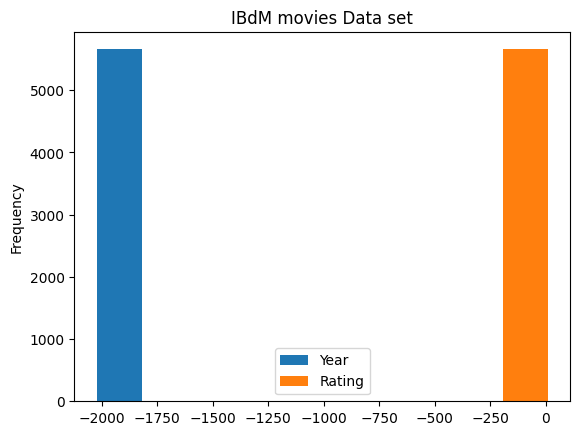

In [20]:
moviedata.plot(kind='hist',title='IBdM movies Data set')

<Axes: xlabel='Rating', ylabel='count'>

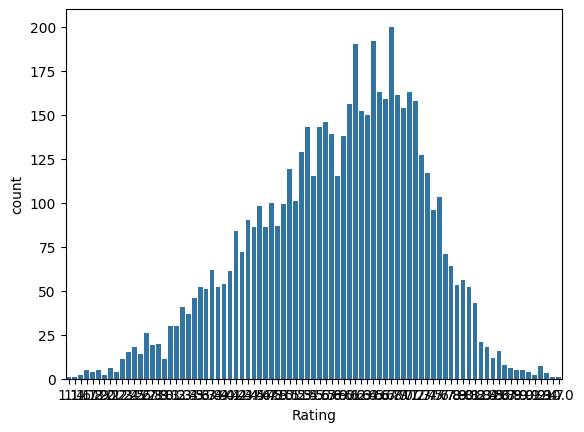

In [22]:
sns.countplot(x='Rating',data=moviedata)

<Axes: xlabel='Votes', ylabel='count'>

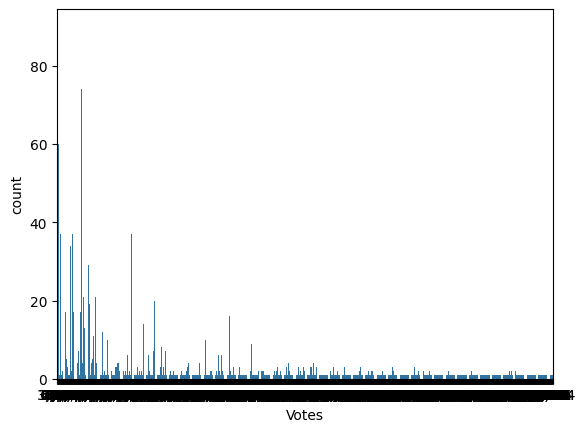

In [23]:
sns.countplot(x='Votes',data=moviedata)

In [5]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


In [6]:
moviedata.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [4]:
moviedata.Rating.unique()

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  4.5,  6.4,  4.1,  4.8,  8.1,
        5.5,  6.8,  5. ,  6.1,  7.7,  5.1,  3.3,  7.8,  8.4,  4.3,  5.8,
        7.5,  3.6,  4.6,  4.2,  5.3,  5.4,  3. ,  8. ,  6. ,  3.1,  3.8,
        7.9,  2.7,  2.4,  7.6,  6.7,  3.4,  5.2,  4.9,  2.8,  3.7,  3.9,
        3.2,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.5,  2.3,  8.5,
        8.6,  2.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.4,  9.7,  1.8,  9.2,
        2. ,  9.1, 10. ,  1.6,  2.2,  1.1])

In [5]:
moviedata.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

In [25]:
def toptencategories(column):
    global moviedata
    
    # Get the top ten categories
    top_ten = moviedata[column].value_counts().sort_values(ascending=False)[:10]
    
    # Create a colormap based on ratings (assuming ratings are in a column named 'Rating')
    # Normalize the ratings to get values between 0 and 1
    norm = plt.Normalize(moviedata['Rating'].min(), moviedata['Rating'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    
    # Create a color array based on the average rating of each category
    avg_ratings = moviedata.groupby(column)['Rating'].mean().reindex(top_ten.index)
    colors = plt.cm.viridis(norm(avg_ratings))
    
    # Plotting
    top_ten.plot(
        kind="bar", 
        figsize=(20, 6), 
        edgecolor="k", 
        color=colors
    )
    
    # Add colorbar
    cbar = plt.colorbar(sm)
    cbar.set_label('Average Rating')
    
    # Customizing plot
    plt.xticks(rotation=0)
    plt.title("Top Ten {} of Movies".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [34]:

def Histogram(column, color='blue'):
    global moviedata
    plt.figure(figsize=(20, 6))
    plt.hist(moviedata[column], edgecolor="k", color=color)
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()



In [11]:
def Scatter(x, y, c=None):
    global moviedata
    plt.figure(figsize=(20,6))
    plt.scatter(moviedata[x], moviedata[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()  

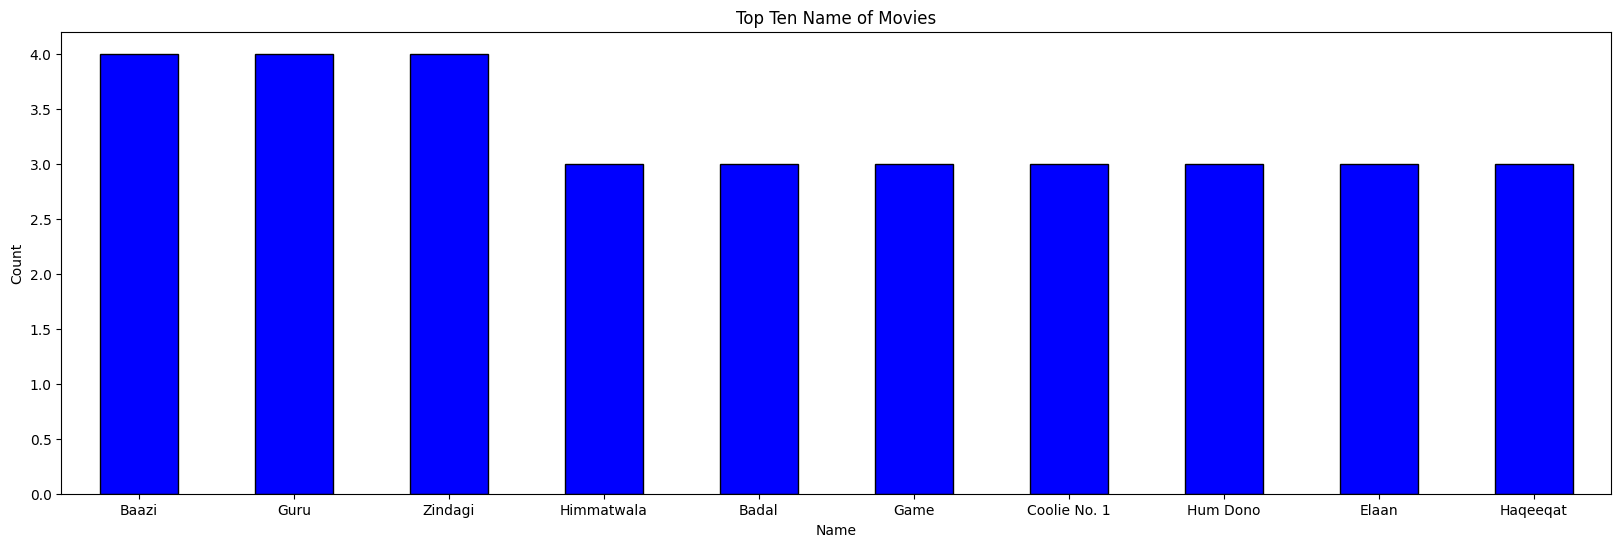

In [27]:
toptencategories('Name')

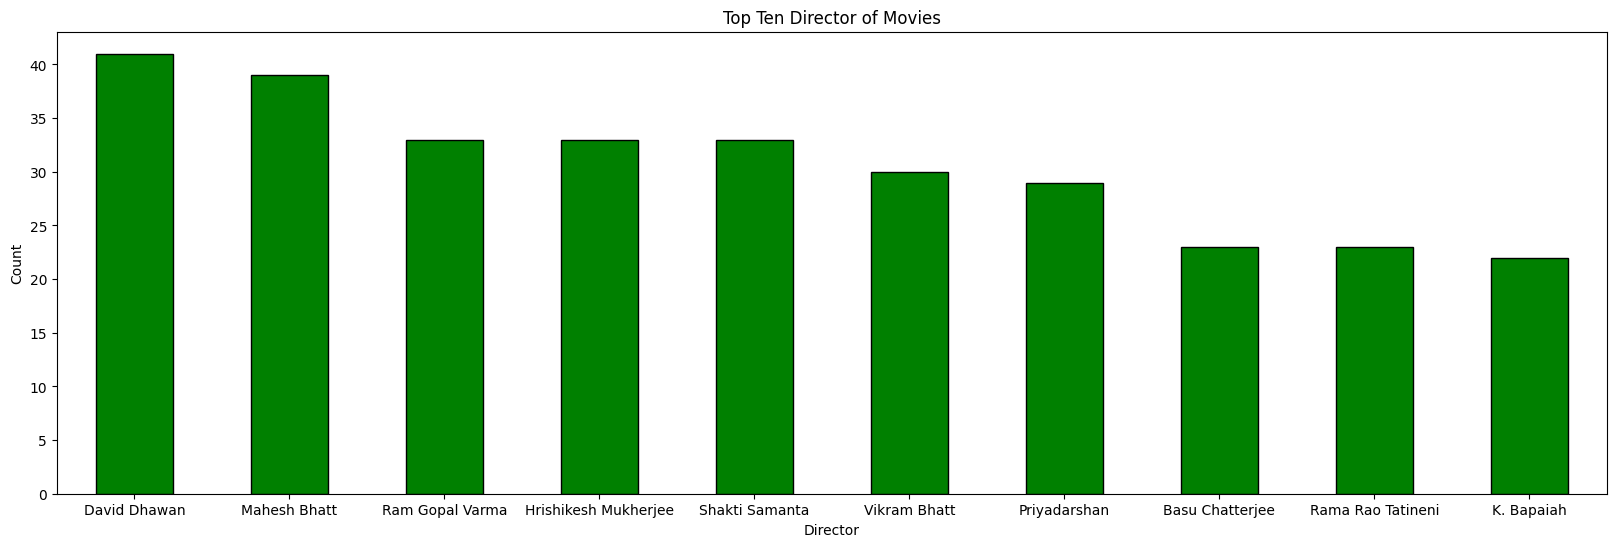

In [28]:
toptencategories('Director',color='green')

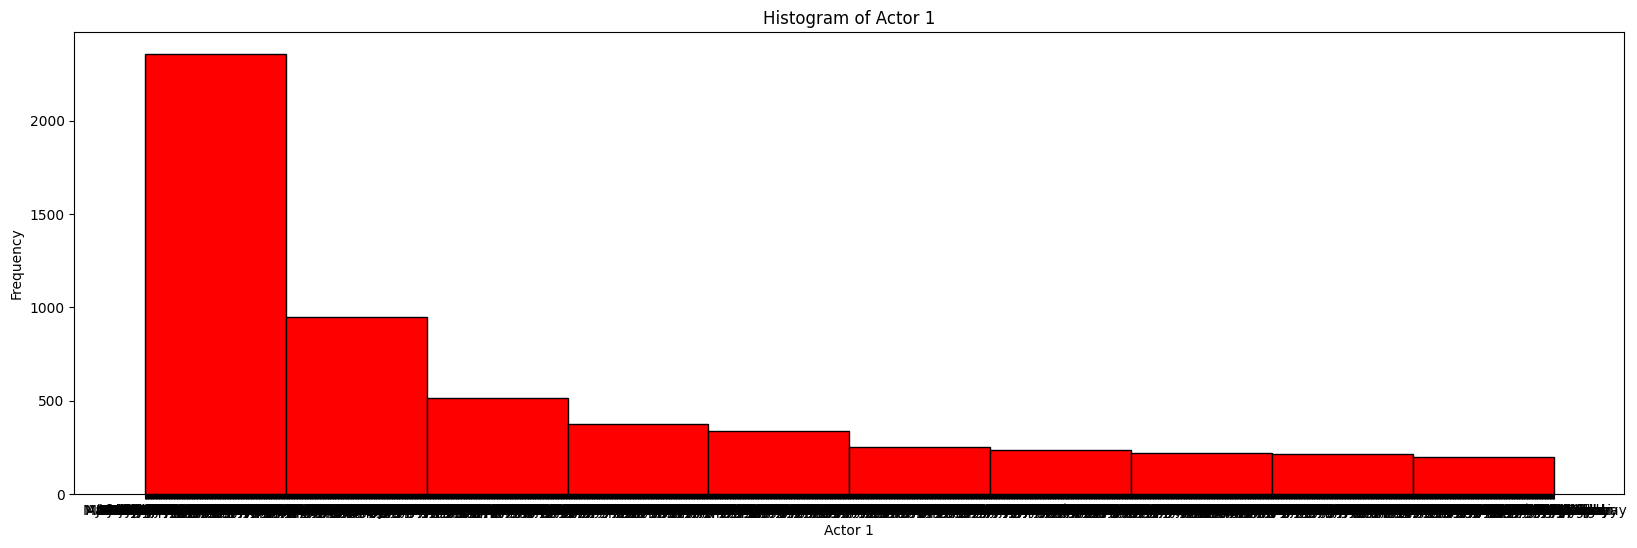

In [35]:
Histogram('Actor 1',color='red')

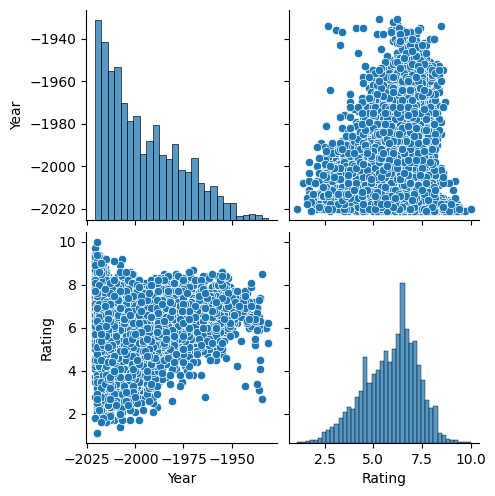

In [41]:
sns.pairplot(moviedata)
numeric_columns = moviedata.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = moviedata[numeric_columns].corr(method='spearman')

EXPLORATORY DATA ANALYSIS

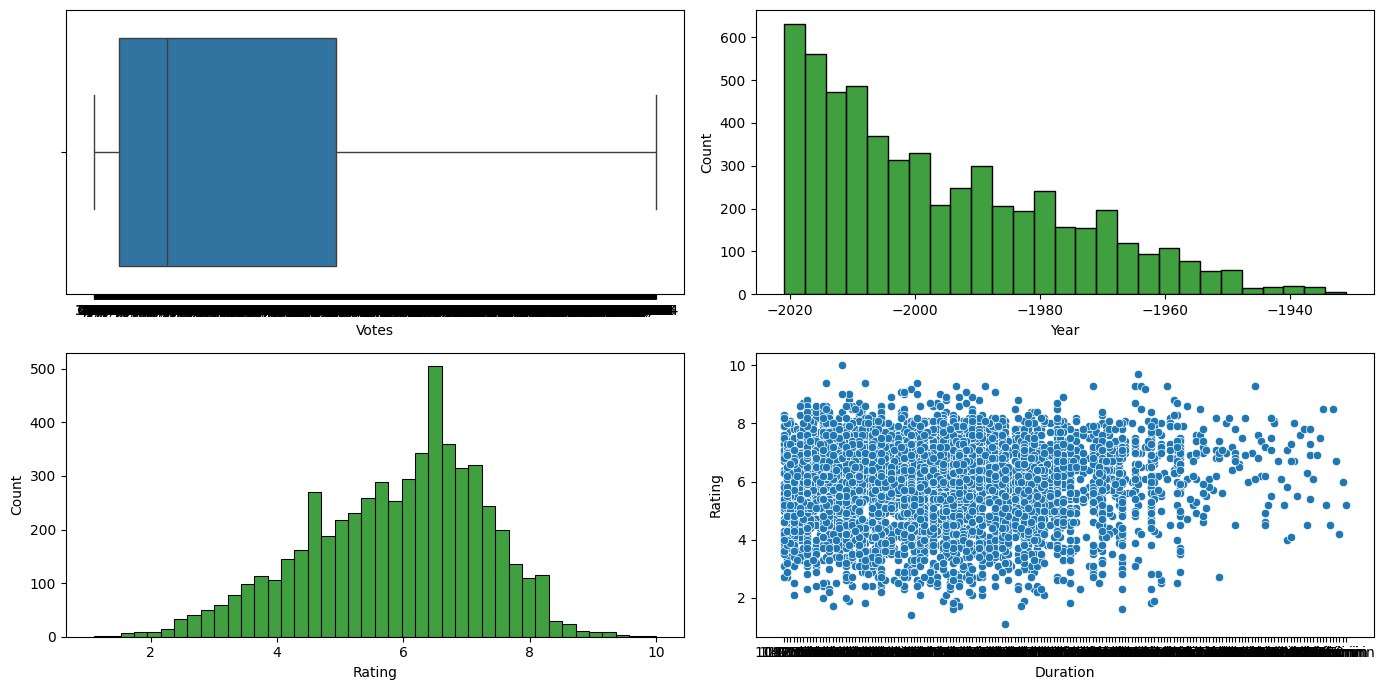

In [10]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Votes',data=moviedata)

plt.subplot(2,2,2)
sns.histplot(moviedata['Year'],color='g')

plt.subplot(2,2,3)
sns.histplot(moviedata['Rating'],color='g')

plt.subplot(2,2,4)
sns.scatterplot(x=moviedata['Duration'], y=moviedata['Rating'], data=moviedata)

plt.tight_layout()
plt.show()

                                                FEATURE ENGINEERING

                                           MACHINE LEARNING MODEL-LINEAR REGRESSION

In [102]:
moviedata.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [42]:
X = moviedata.drop(columns=['Rating'])
Y = moviedata['Rating']
X.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War","1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [43]:
Y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [44]:
print(len(X))
print(len(Y))

5659
5659


In [39]:
print("First 5 elements of X:", X[:5])
print("First 5 elements of Y:", Y[:5])

First 5 elements of X:                                  Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
3                             #Yaaram -2019.0  110 min   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                           ...Yahaan -2005.0  142 min   
8                  ?: A Question Mark -2012.0   82 min   

                       Genre  Votes        Director          Actor 1  \
1                      Drama      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoor  
6          Mini

In [46]:
if isinstance(Y, np.ndarray) and Y.ndim == 2:
    Y = Y.ravel()

print(f"Transformed Y shape: {np.shape(Y)}")

Transformed Y shape: (5659,)


In [47]:
if isinstance(Y, list) and isinstance(Y[0], list):
    Y = [item for sublist in Y for item in sublist]

print(f"Transformed Y length: {len(Y)}")

Transformed Y length: 5659


In [69]:
label_encoder = LabelEncoder()
X['Name'] = label_encoder.fit_transform(X['Name'])
X['Director'] = label_encoder.fit_transform(X['Director'])
X['Duration'] = label_encoder.fit_transform(X['Duration'])
X['Genre'] = label_encoder.fit_transform(X['Genre'])
X['Votes'] = label_encoder.fit_transform(X['Votes'])
X['Actor 1'] = label_encoder.fit_transform(X['Actor 1'])
X['Actor 2'] = label_encoder.fit_transform(X['Actor 2'])
X['Actor 3'] = label_encoder.fit_transform(X['Actor 3'])

In [70]:
if len(X) == len(Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
else:
    print(f"Length of X: {len(X)}, Length of Y: {len(Y)}")
    raise ValueError("The length of X and Y must match.")

(4527, 9) (1132, 9) (4527,) (1132,)


In [72]:
lr=LinearRegression()
lr=lr.fit(X_train,Y_train)
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)
RMSE_test=np.sqrt(mean_squared_error(Y_test,test_pred))
RMSE_train=np.sqrt(mean_squared_error(Y_train,train_pred))
print('RMSE testing Data',str(RMSE_test))
print('RMSE training Data',str(RMSE_train))  
print('R Squared Value on Training',lr.score(X_train,Y_train))
print('R Squared Value on Testing',lr.score(X_test,Y_test))

RMSE testing Data 1.3522952451823553
RMSE training Data 1.3298364342515685
R Squared Value on Training 0.07040161489717234
R Squared Value on Testing 0.04955671849261423


In [74]:
errors=abs(test_pred-Y_test)


In [75]:
map=100*(errors/Y_test)

In [76]:
accuracy=100-np.mean(map)

In [77]:
print('Prediction',round(accuracy,2),'%')

Prediction 78.59 %
